# Gated Recurrent Units (GRUs)

A type of Recurrent Neural Network (RNN) designed to handle sequential data while mitigating the vanishing gradient problem, which often hampers traditional RNNs.

### Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.utils import to_categorical

### Step 2: Prepare Dataset
We will use a small text corpus and generate sequences from it.

In [2]:
# Example text
text = "hello world"

# Create a mapping of characters to integers
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Convert text to integer sequence
encoded_text = np.array([char_to_int[c] for c in text])

# Generate sequences
sequence_length = 4  # Number of characters in each sequence
X = []
y = []
for i in range(len(encoded_text) - sequence_length):
    X.append(encoded_text[i:i + sequence_length])
    y.append(encoded_text[i + sequence_length])

X = np.array(X)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, num_classes=len(chars))

### Step 3: Build the GRU Model
Define a GRU-based model to predict the next character.

In [9]:
model = Sequential([
    Embedding(input_dim=len(chars), output_dim=10, input_length=sequence_length),
    GRU(50, return_sequences=False),
    Dense(len(chars), activation='softmax')
])

model.compile(optimizer='adamw', loss='categorical_crossentropy', metrics=['accuracy'])

### Step 4: Train the Model
Fit the model on the sequences.

In [10]:
history = model.fit(X, y, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
4/4 - 1s - 222ms/step - accuracy: 0.0000e+00 - loss: 2.0853
Epoch 2/100
4/4 - 0s - 16ms/step - accuracy: 0.1429 - loss: 2.0748
Epoch 3/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 2.0678
Epoch 4/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 2.0611
Epoch 5/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 2.0529
Epoch 6/100
4/4 - 0s - 15ms/step - accuracy: 0.2857 - loss: 2.0459
Epoch 7/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 2.0387
Epoch 8/100
4/4 - 0s - 15ms/step - accuracy: 0.2857 - loss: 2.0285
Epoch 9/100
4/4 - 0s - 15ms/step - accuracy: 0.2857 - loss: 2.0186
Epoch 10/100
4/4 - 0s - 15ms/step - accuracy: 0.2857 - loss: 2.0091
Epoch 11/100
4/4 - 0s - 15ms/step - accuracy: 0.2857 - loss: 1.9952
Epoch 12/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 1.9790
Epoch 13/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 1.9639
Epoch 14/100
4/4 - 0s - 16ms/step - accuracy: 0.2857 - loss: 1.9429
Epoch 15/100
4/4 - 0s - 16ms/step - accuracy: 0.2857

### Step 5: Make Predictions
Use the trained model to generate text predictions.

In [11]:
# Start with a seed sequence
seed_text = "hell"
seed_encoded = np.array([char_to_int[c] for c in seed_text])

# Predict the next characters
generated_text = seed_text
for _ in range(10):  # Generate 10 characters
    seed_encoded = seed_encoded.reshape((1, sequence_length))
    predicted_char_index = np.argmax(model.predict(seed_encoded, verbose=0))
    predicted_char = int_to_char[predicted_char_index]
    
    generated_text += predicted_char
    seed_encoded = np.append(seed_encoded[0][1:], predicted_char_index)

print("Generated text:", generated_text)

Generated text: hello worldo w


# Daily Minimum Temperatures in Melbourne, Australia dataset

### Steps Overview
- Load and Preprocess Data
- Build and Train the GRU Model
- Visualize Training History
- Evaluate the Model
- Deploy the Model for Predictions

### Step 1: Load and Preprocess Data
Download and Explore the Dataset

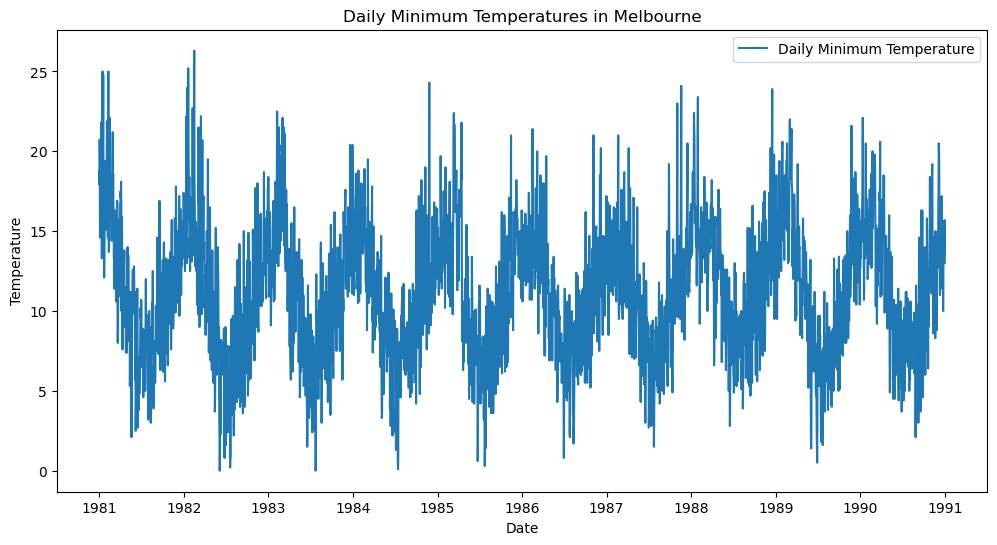

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label="Daily Minimum Temperature")
plt.title("Daily Minimum Temperatures in Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

#### Prepare the Dataset for GRU
We create sequences of temperature data to predict the next day’s temperature.

In [27]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Temp'].values.reshape(-1, 1))

# Create sequences
sequence_length = 30  # Use the last 30 days to predict the next day
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Step 2: Build and Train the GRU Model
Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
import tensorflow as tf

tf.keras.backend.clear_session() # Clear existing model
# Build the GRU model using Input layer
model = Sequential([
    Input(shape=(sequence_length, 1)),  # Explicit Input layer
    GRU(50, activation='relu'),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

Train the Model

In [32]:
import os
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private' # Enable private thread mode   
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' # Enable GPU memory growth
os.environ['MPS_VISIBLE_DEVICES'] = '0' # Set the GPU to use for MPS
#os.environ['CUDA_VISIBLE_DEVICES'] = '0' # Set the GPU to use for CUDA

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 78s 853ms/step - loss: 0.0166 - mae: 0.1034 - val_loss: 0.0160 - val_mae: 0.0998
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 865ms/step - loss: 0.0156 - mae: 0.0997 - val_loss: 0.0154 - val_mae: 0.0980
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 77s 849ms/step - loss: 0.0152 - mae: 0.0983 - val_loss: 0.0147 - val_mae: 0.0956
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 873ms/step - loss: 0.0145 - mae: 0.0945 - val_loss: 0.0142 - val_mae: 0.0940
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 870ms/step - loss: 0.0143 - mae: 0.0937 - val_loss: 0.0139 - val_mae: 0.0926
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 76s 838ms/step - loss: 0.0133 - mae: 0.0910 - val_loss: 0.0136 - val_mae: 0.0915
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 864ms/step - loss: 0.0134 - mae: 0.0905 - val_loss: 0.0132 - val_mae: 0.0904
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 76s 836ms/step - loss: 0.0132 - mae: 0.0909 - val_loss: 0.0129 - val_mae: 0.0893
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 864ms/

### Step 3: Visualize Training History

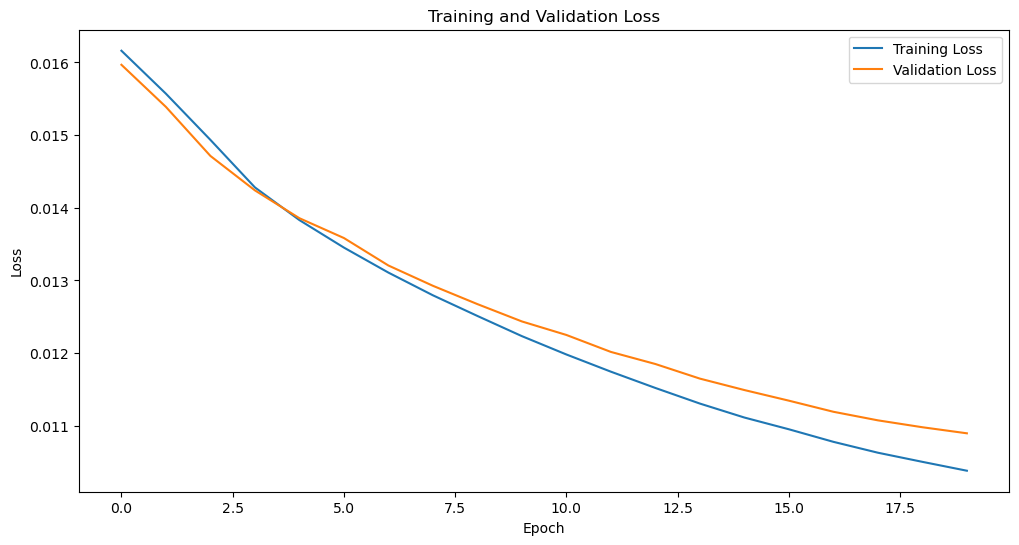

In [33]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 4: Evaluate the Model

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0107 - mae: 0.0800
Test Loss: 0.010895473882555962, Test MAE: 0.08139850199222565
 2/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step 

2024-12-03 23:22:33.233159: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


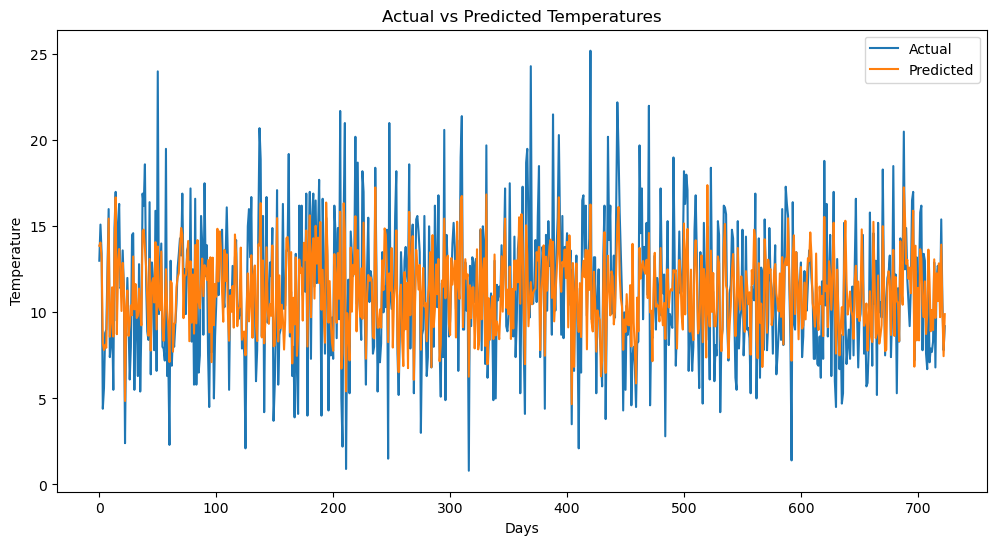

In [34]:
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Step 5: Deploy the Model for Predictions
Save the Model

In [35]:
from tensorflow.keras.models import save_model
save_model(model, 'gru_temperature_model.keras')
# model.save("gru_temperature_model.h5")
print("Model saved!")

Model saved!


#### Load and Use the Model for Future Predictions

In [36]:
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model("gru_temperature_model.keras")

# Prepare a new input (use the last 30 days of data from the dataset)
latest_sequence = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)

# Predict the next day's temperature
predicted_temp_scaled = loaded_model.predict(latest_sequence)
predicted_temp = scaler.inverse_transform(predicted_temp_scaled)
print(f"Predicted temperature for the next day: {predicted_temp[0][0]:.2f}°C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
Predicted temperature for the next day: 12.87°C
